In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install q tensorflow==2.2
!pip install q keras==2.3.0

     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 454 kB 47.5 MB/s 
     |████████████████████████████████| 3.0 MB 38.3 MB/s 
     |████████████████████████████████| 2.9 MB 39.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [3]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-e_eu99m8
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-e_eu99m8
     |████████████████████████████████| 3.3 MB 5.4 MB/s 
     |████████████████████████████████| 948 kB 36.9 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34556 sha256=d83b467e8025c92edb96a9d292c9712b0330f94224b3a923b0c383497c84853a
  Stored in directory: /tmp/pip-ephem-wheel-cache-oz3f0m03/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resol

In [4]:
from keras_segmentation.models.segnet import mobilenet_segnet
model = mobilenet_segnet(n_classes=12 ,   input_height=384, input_width=480  )

Using TensorFlow backend.


17227776/17225924 [==============================] - 0s 0us/step


In [6]:
history = model.train(
    train_images =  "/content/drive/MyDrive/dataset1/images_prepped_train/",
    train_annotations = "/content/drive/MyDrive/dataset1/annotations_prepped_train/",
    input_height=384,
    input_width=480,
    n_classes=12,
    do_augment=True,
    val_images="/content/drive/MyDrive/dataset1/images_prepped_val/",
    val_annotations="/content/drive/MyDrive/dataset1/annotations_prepped_val/",
    augmentation_name="aug_all",
    epochs=80,
    validate = True,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=146,
    val_steps_per_epoch=37,
)

Verifying training dataset


100%|██████████| 293/293 [00:03<00:00, 74.18it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 74/74 [00:01<00:00, 73.20it/s]


Dataset verified! 
Epoch 1/80


/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:272: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  image, n_segments=n_segments_samples[i], compactness=10)


146/146 [==============================] - 61s 419ms/step - loss: 0.4587 - accuracy: 0.9766 - precision: 0.9002 - recall: 0.8093 - val_loss: 0.5844 - val_accuracy: 0.9777 - val_precision: 0.9026 - val_recall: 0.8211
Epoch 2/80
146/146 [==============================] - 47s 323ms/step - loss: 0.4513 - accuracy: 0.9776 - precision: 0.9019 - recall: 0.8198 - val_loss: 0.5551 - val_accuracy: 0.9780 - val_precision: 0.9040 - val_recall: 0.8239
Epoch 3/80
146/146 [==============================] - 47s 325ms/step - loss: 0.4468 - accuracy: 0.9781 - precision: 0.9042 - recall: 0.8244 - val_loss: 0.5242 - val_accuracy: 0.9783 - val_precision: 0.9047 - val_recall: 0.8261
Epoch 4/80
146/146 [==============================] - 47s 323ms/step - loss: 0.4329 - accuracy: 0.9783 - precision: 0.9048 - recall: 0.8264 - val_loss: 0.4921 - val_accuracy: 0.9784 - val_precision: 0.9052 - val_recall: 0.8274
Epoch 5/80
146/146 [==============================] - 47s 322ms/step - loss: 0.4566 - accuracy: 0.9783 

In [13]:
model.save("model.h5")

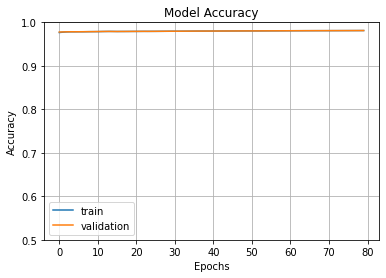

In [21]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.5,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show(history)  

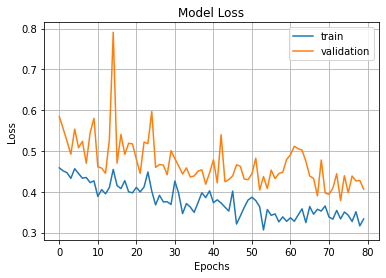

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

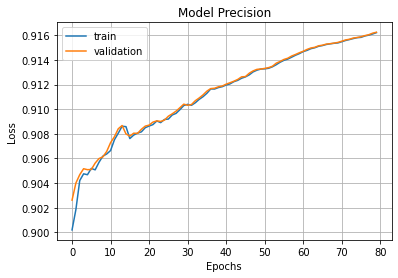

In [26]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.grid()
plt.title('Model Precision')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

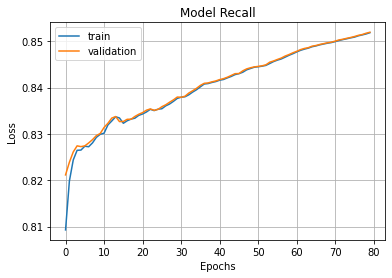

In [27]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.grid()
plt.title('Model Recall')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

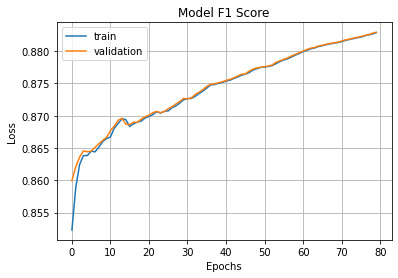

In [38]:
num = [history.history['precision'][i] * history.history['recall'][i] for i in range(len(history.history['precision']))]
den = [history.history['precision'][i] + history.history['recall'][i] for i in range(len(history.history['precision']))]
f1_score = [2*(num[i] / den[i]) for i in range(len(den))]
num_val = [history.history['val_precision'][i] * history.history['val_recall'][i] for i in range(len(history.history['val_precision']))]
den_val = [history.history['val_precision'][i] + history.history['val_recall'][i] for i in range(len(history.history['val_precision']))]
f1_score_val = [2*(num_val[i] / den_val[i]) for i in range(len(den_val))]

plt.plot(f1_score)
plt.plot(f1_score_val)
plt.grid()
plt.title('Model F1 Score')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [7]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

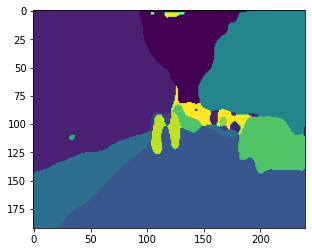

In [8]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(out)

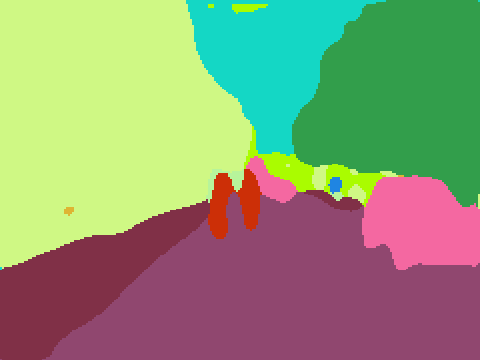

In [9]:
from IPython.display import Image
Image('/tmp/out.png')

In [11]:
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

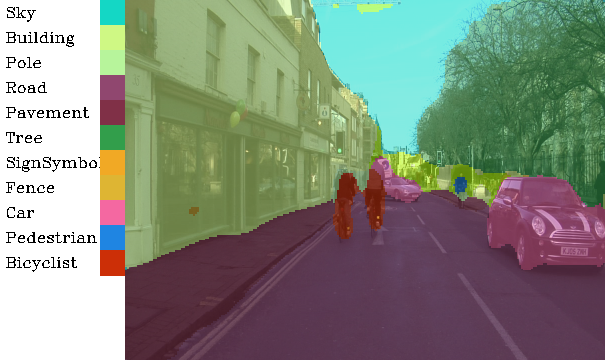

In [12]:
from IPython.display import Image
Image('/tmp/out.png')